In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_size = 0.01
cutoff_variance = 0.8
cv = 5
random_state = 42
np.random.seed(random_state)

train_ds = pd.read_csv('../data/train.csv')
print("Shape of the training data {}".format(train_ds.shape))

Shape of the training data (200000, 77)


In [4]:
train_ds.sample(n=10,axis=0,replace=False,random_state=random_state)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
119737,119737,0,0,15,0,0,0,0,0,11,...,0,0,1,0,0,0,1,0,0,Class_3
72272,72272,0,0,1,0,0,1,0,0,0,...,0,0,0,0,3,0,0,0,0,Class_6
158154,158154,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_6
65426,65426,6,0,0,0,0,2,0,0,0,...,3,7,2,1,0,0,0,1,1,Class_8
30074,30074,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_1
23677,23677,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
134858,134858,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,Class_9
176418,176418,0,0,0,0,0,14,0,0,0,...,0,0,1,1,1,2,0,0,0,Class_2
132467,132467,0,2,1,3,1,0,0,7,8,...,0,1,0,0,20,18,1,0,1,Class_8
4082,4082,40,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,Class_5


In [5]:
train_ds.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,99999.500000,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,...,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,57735.171256,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,...,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,49999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,99999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,149999.250000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,...,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,199999.000000,61.000000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.00000,...,54.000000,24.000000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.00000,52.000000


In [6]:
train_ds.nunique().sort_values(ascending=False)[:30]

id            200000
feature_15       105
feature_60        99
feature_59        92
feature_73        91
feature_46        87
feature_28        78
feature_32        77
feature_54        72
feature_61        70
feature_63        70
feature_19        66
feature_55        65
feature_47        63
feature_62        61
feature_3         59
feature_29        58
feature_67        57
feature_41        56
feature_22        55
feature_5         55
feature_43        53
feature_69        52
feature_9         51
feature_24        50
feature_74        50
feature_70        49
feature_27        49
feature_51        49
feature_2         48
dtype: int64

In [7]:
train_ds['feature_15'].sort_values(ascending=False)[:20]

5720      121
136512    121
170579    121
194227    121
139467    121
35122     121
122104    121
158679    121
58394     121
11137     121
147248    116
9337      116
36011     114
195947    114
131402    114
191503    114
167814    114
110439    114
43741     114
66914     114
Name: feature_15, dtype: int64

In [8]:
target = 'target'
classes = train_ds[target].unique()
classes.sort()
print(classes)

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(train_ds[target])
X_full = train_ds.drop(['id',target],axis=1)

np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
X_full.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,6,1,0,0,0,0,7,0,...,3,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,3,0,0,...,8,0,0,0,0,1,0,0,0,0
3,0,0,7,0,1,5,2,2,0,1,...,0,0,4,0,2,2,0,4,3,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# some models are commented for a quicker execution
# for a complete analysis uncomment model labels and, while the notebook is running, have a coffee...
model_lbls = ['dt' # decision tree
             #,'nb' # gaussian naive bayes
             ,'rf'   # random forest
             #,'lp'   # linear perceptron
             #,'svc'  # support vector
             #,'knn'  # k nearest neighbours
             #,'adb'  # adaboost
            ]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state),
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': [{'var_smoothing': [10**exp for exp in range(-3,-12,-1)]}]
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(random_state=random_state),
           'param': [{'early_stopping': [True,False],'class_weight':[None,'balanced']}],
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(random_state=random_state),
           'param': [{'kernel': ['rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100],
                    },
                   ]
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}]
       },
    'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(random_state=random_state),
           'param': [{'n_estimators':[20,30,40,50]
                     ,'learning_rate':[0.5,0.75,1,1.25,1.5]}]
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(random_state=random_state),
           'param': [{
                      # 'max_depth': [*range(4,30)]
                      'max_depth': [*range(4,30,4)]
                    #  ,'n_estimators':[*range(20,80,5)]
                     ,'n_estimators':[*range(10,30,5)]
                     ,'class_weight': [None,'balanced']
                      }]
          }

}


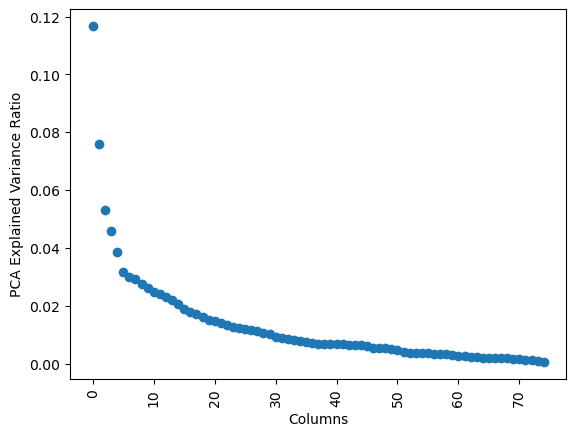

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_trans = pca.fit_transform(X_full)
plt.scatter(range(X_full.shape[1]), pca.explained_variance_ratio_);

plt.xlabel('Columns')
plt.ylabel('PCA Explained Variance Ratio')

plt.xticks(rotation = 90)

plt.show()


In [34]:
explained_variances = pca.explained_variance_ratio_
sorted_variances = explained_variances.copy()
cumulative_variances = np.cumsum(sorted_variances)

cutoff_index = np.argmax(cumulative_variances > cutoff_variance)
print("Used the top {} transformed variables".format(cutoff_index))
X = X_trans[:, :cutoff_index+1]

Used the top 30 transformed variables


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X.shape[1]))

There are 2000 samples in the training dataset
There are 198000 samples in the testing dataset
Each sample has 31 features


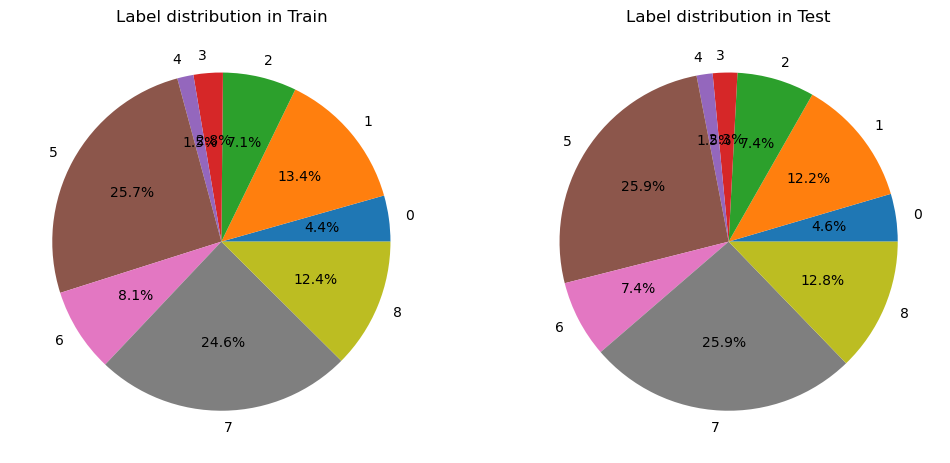

In [40]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
ax1.pie(np.unique(y_train, return_counts=True)[1], labels=np.unique(y_train, return_counts=True)[0], autopct='%1.1f%%');
ax1.set_title("Label distribution in Train")
ax2.pie(np.unique(y_test, return_counts=True)[1], labels=np.unique(y_test, return_counts=True)[0], autopct='%1.1f%%');
ax2.set_title("Label distribution in Test")
plt.show()

In [41]:
scorings = ['accuracy'
            # ,'precision_macro'
            # ,'recall_macro'
            ,'f1_macro'
            ]

In [42]:
from sklearn.model_selection import ParameterGrid
trials = {lbl: len(list(ParameterGrid(models[lbl]['param']))) for lbl in model_lbls}
trials

{'dt': 38, 'rf': 56}

In [43]:
clfs = []
results = pd.DataFrame(columns=['scoring','model','best_params','accuracy','precision_macro','recall_macro','f1_macro'])


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

for scoring in scorings:
    for m in model_lbls: 
        clf = GridSearchCV(models[m]['estimator'],models[m]['param'],scoring=scoring, cv=cv )
        clf.fit(X_train,y_train)
        clfs.append(clf)
        y_pred = clf.predict(X_test)
        cr = classification_report(y_test,y_pred,output_dict=True
                                   , zero_division=1)
        
        results.loc[len(results)] = [
                                    scoring,models[m]['name'],clf.best_params_,
                                    cr['accuracy']
                                    ,cr['macro avg']['precision']
                                    ,cr['macro avg']['recall']
                                    ,cr['macro avg']['f1-score']
                                    ] 
                                    


In [47]:
for score in scorings:
    scoring_filter = score
    display(
        results[results.scoring==scoring_filter]\
        .drop('scoring',axis=1)
        .sort_values(by=scoring_filter, ascending=False)\
        .style.format(precision=3)\
        .set_caption('Results for scoring "{}"'.format(scoring_filter))
    )

,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
1,Random forest,"{'class_weight': None, 'max_depth': 8, 'n_estimators': 25}",0.320,0.264,0.161,0.135
0,Decision Tree,"{'class_weight': None, 'max_depth': 3}",0.307,0.682,0.148,0.126


,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
3,Random forest,"{'class_weight': 'balanced', 'max_depth': 8, 'n_estimators': 25}",0.261,0.156,0.163,0.157
2,Decision Tree,"{'class_weight': None, 'max_depth': 7}",0.282,0.149,0.148,0.132


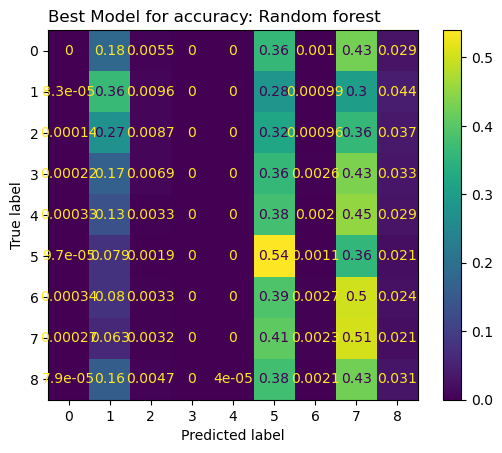

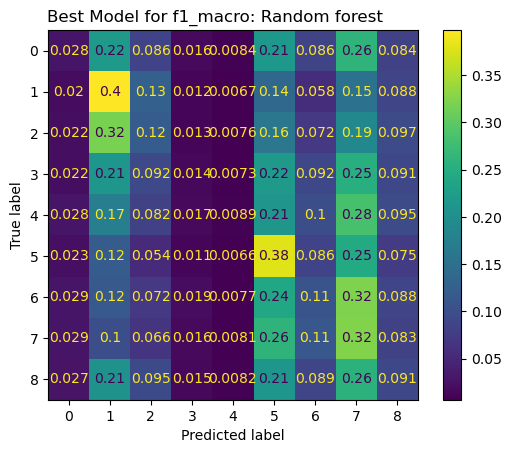

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

for score in scorings:
    scoring_filter = score
    best_row = results.loc[results.scoring==scoring_filter,scoring_filter].idxmax(axis=0)
    disp = ConfusionMatrixDisplay.from_estimator(estimator=clfs[best_row], X=X_test, y=y_test, normalize='true')
    disp.ax_.set_title("Best Model for {}: {}".format(score,results.at[best_row,'model']))
plt.show()

In [60]:
test_url = '../data/test.csv'
u_test_ds = pd.read_csv(test_url).drop('id', axis=1)
print("Shape of the test data {}".format(u_test_ds.shape))

Shape of the test data (100000, 75)


In [64]:
X_u_test = pca.transform(u_test_ds)[:, :cutoff_index+1]

In [61]:
results

,scoring,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
0,accuracy,Decision Tree,"{'class_weight': None, 'max_depth': 3}",0.307162,0.682211,0.148385,0.125871
1,accuracy,Random forest,"{'class_weight': None, 'max_depth': 8, 'n_esti...",0.319884,0.264362,0.161245,0.135065
2,f1_macro,Decision Tree,"{'class_weight': None, 'max_depth': 7}",0.282278,0.148760,0.147778,0.132456
3,f1_macro,Random forest,"{'class_weight': 'balanced', 'max_depth': 8, '...",0.260591,0.155751,0.163382,0.156824


In [62]:
scoring_filter = 'f1_macro'
best_row = results.loc[results.scoring==scoring_filter,scoring_filter].idxmax(axis=0)
best_row

np.int64(3)

In [65]:
best_estimator=clfs[best_row]
y=best_estimator.predict(X_u_test)
y.shape

(100000,)

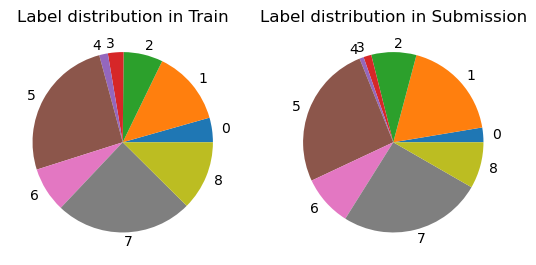

In [66]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.pie(np.unique(y_train, return_counts=True)[1], labels=np.unique(y_train, return_counts=True)[0]);
ax1.set_title("Label distribution in Train")
ax2.pie(np.unique(y, return_counts=True)[1], labels=np.unique(y, return_counts=True)[0]);
ax2.set_title("Label distribution in Submission")
plt.show()